# Decision Tree Regressor 

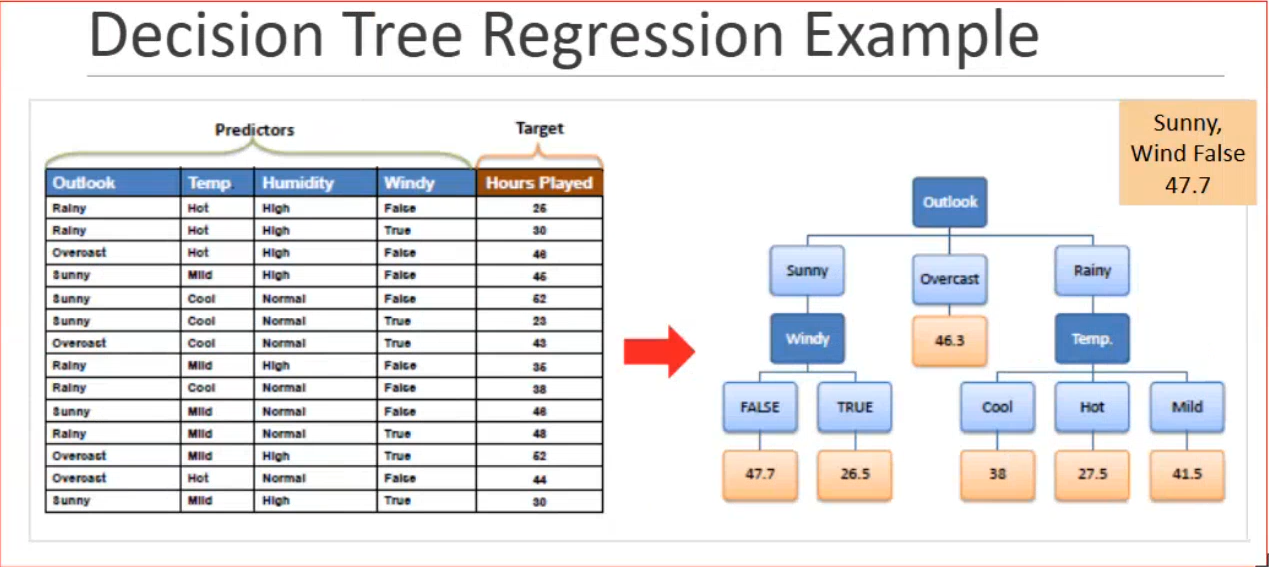

In [1]:
from warnings import filterwarnings
filterwarnings ("ignore")


## Data Ingestion
    Power Plant Dataset
    AT : Atmospheric Temprature (Celcius)
    V : Vaccume Pressure (Pa -> Pascal)
    AP : Atmospheric Pressure (Pa)
    RH : Relative Humidity (%)

    PE : Power Plant Energy output in (Mw)

In [2]:
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\PowerPlant.csv"

In [3]:
import pandas as pd 
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Basic Data Quality Checks

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.shape

(9568, 5)

In [6]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
# Check Duplicata Data
df.duplicated().sum()

np.int64(41)

# There are 41 duplicated rows in this data, lets drop them

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(9527, 5)

## Separate X and Y

In [12]:
X = df.drop(columns="PE")
Y = df[["PE"]]

In [13]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [14]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data Cleaning

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [17]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [18]:
X_pre = con_pipe.fit_transform(X)

In [19]:
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,test_size=0.25,random_state=42)

In [21]:
xtrain.head()

,AT,V,AP,RH
1845,-0.886381,-0.795657,0.961736,0.845161
8505,0.939249,0.960659,-1.268824,-0.564462
8152,-0.957579,-0.966717,0.729421,0.563784
5023,0.143978,0.439598,0.983620,0.489161
1744,-1.214161,-0.967505,-2.257003,1.596868


In [22]:
ytrain.head()

,PE
1845,469.02
8505,436.65
8152,469.18
5023,445.18
1744,472.41


In [23]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [24]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


# Model Building : Decision Tree regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=5,
    min_samples_split=3,
    criterion="absolute_error"
)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=5, min_samples_split=3)

In [26]:
model.score(xtrain,ytrain)

0.9240914171555754

In [27]:
model.score(xtest,ytest)

0.9264239023487078

# Hyperparameter Tuning (to overcome the overfitting scenario)

In [28]:
params = {
    "max_depth" : [2,3,4,5,6,7,8,9],
    "min_samples_leaf" : [2,3,5,6,7,8,9],
    "min_samples_split" : [2,4,5,6,8,7,9],
    "criterion" : ["squared_error","absolute_error"]
}

# Hyperparameter Tuning
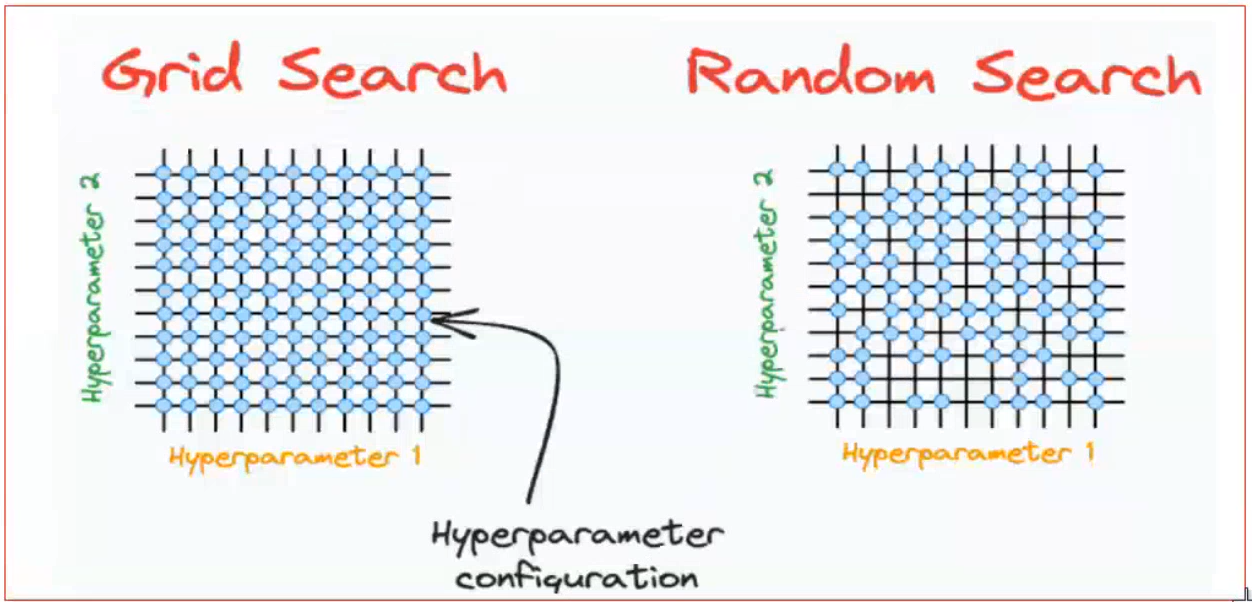

In [29]:
from sklearn.model_selection import RandomizedSearchCV
base_model = DecisionTreeRegressor()
rscv = RandomizedSearchCV(base_model,param_distributions=params,scoring="r2",cv=5)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [2, 4, 5, 6, 8, 7,
                                                              9]},
                   scoring='r2')

In [30]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 9,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [31]:
rscv.best_score_

np.float64(0.9391008035223042)

In [32]:
best_dtr = rscv.best_estimator_

In [33]:
best_dtr

DecisionTreeRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=7)

# Model Evaluation
    Evaluation Metrics

In [34]:
best_dtr.score(xtrain,ytrain)

0.9550872924275358

In [35]:
best_dtr.score(xtest,ytest)

0.9447660150716588

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
ypred_train = model.predict(xtrain)
ypred_train[:5]

array([470.16, 434.02, 470.16, 450.14, 472.11])

In [38]:
mse = mean_squared_error(ytrain,ypred_train)
mae = mean_absolute_error(ytrain,ypred_train)
r2 = r2_score(ytrain,ypred_train)
print(f"Model Evaluation Metrics : Training Data")
print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2_score : {r2}")

Model Evaluation Metrics : Training Data
MSE : 21.83100918824353
MAE : 3.5564870538838345
R2_score : 0.9240914171555754


In [39]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([432.07 , 483.57 , 477.49 , 450.14 , 444.665])

In [40]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
print(f"Model Evaluation Metrics : Training Data")
print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2_score : {r2}")

Model Evaluation Metrics : Training Data
MSE : 21.945271568010075
MAE : 3.6346242653232577
R2_score : 0.9264239023487078


## Plot the DTR model tree we built

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [42]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

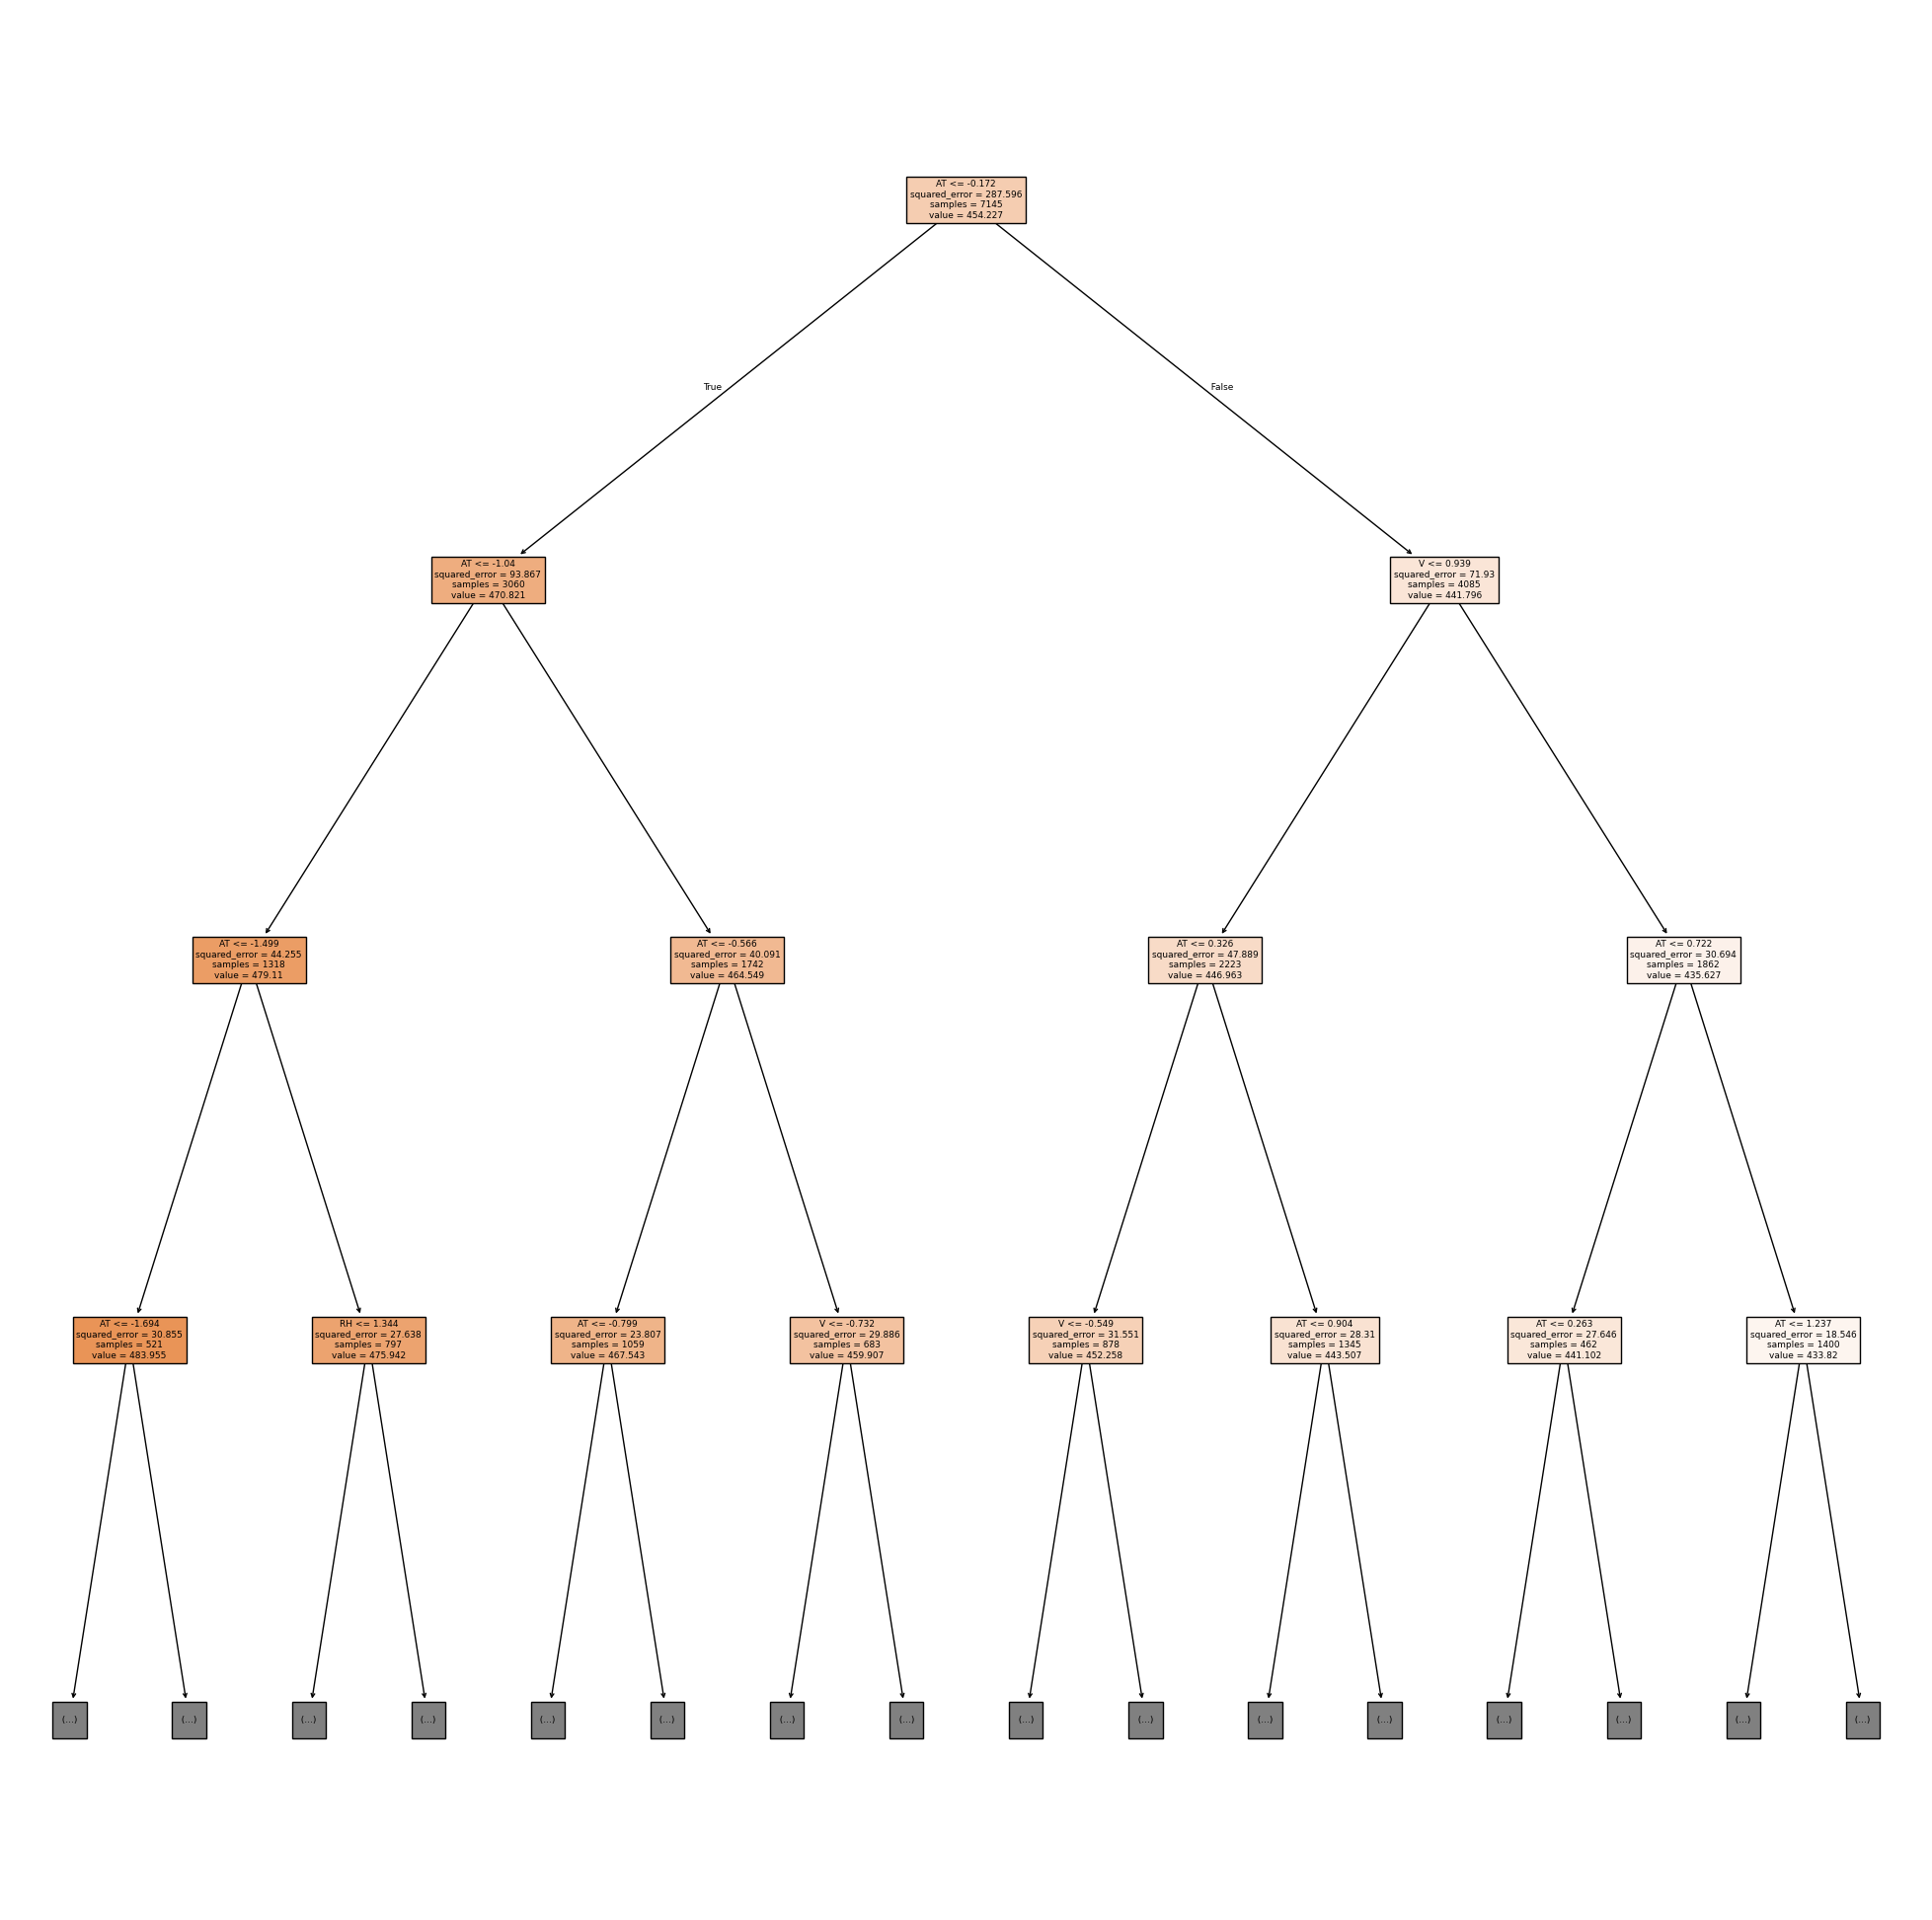

In [43]:
plt.figure(figsize=(25,25))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=3,filled=True)
plt.show()

In [44]:
best_dtr.feature_importances_

array([0.90013055, 0.08413718, 0.00824732, 0.00748495])

In [45]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [46]:
imp_features = pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp_features

AT    0.900131
V     0.084137
AP    0.008247
RH    0.007485
dtype: float64

<Axes: >

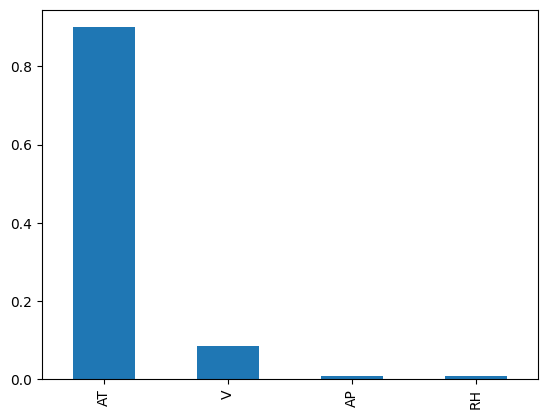

In [47]:
imp_features.plot(kind="bar")

## Model is resulting in highest r2 score > 0.8. We can consider this model for out of sample Predictions

In [48]:
path2 = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\PowerPlantTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [49]:
xnew_pre = con_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [50]:
PE_predictions = best_dtr.predict(xnew_pre)
PE_predictions = PE_predictions.round(2)
PE_predictions

array([445.74, 437.72, 439.32])

# Save the data

In [51]:
xnew["PE_Predicted"] = PE_predictions
xnew

,AT,V,AP,RH,PE_Predicted
0,25,51.5,1000.1,57.0,445.74
1,32,41.0,1051.1,80.0,437.72
2,28,NaN,1010.2,NaN,439.32


In [52]:
xnew.to_csv("PE_predictions results.csv")

## Save the model and preprocessor in joblib format

In [53]:
import joblib

joblib.dump(con_pipe, "pre.joblib")

['pre.joblib']

In [54]:
joblib.dump(best_dtr, "PowerModel.joblib")

['PowerModel.joblib']

# Load the models

In [55]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [56]:
m = joblib.load("PowerModel.joblib")
m

DecisionTreeRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=7)